<a href="https://colab.research.google.com/github/daniyarulydanial/guided_mini_projects/blob/main/%D0%94%D0%B0%D0%BD%D0%B8%D1%8F%D1%80%D1%83%D0%BB%D1%8B_%D0%94%D0%B0%D0%BD%D0%B8%D0%B0%D0%BB_%222_%D0%B8_3_%D0%B4%D0%B5%D0%BD%D1%8C_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ данных

В качестве тренировки будем прогнозировать температуру на улице в зависимости от дня в году на основе исторических даных. Построим разные модели, научимся их сравнивать и выберем лучшую.

Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)


# Часть 1: скачиваем и визуализируем данные

In [ ]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2022-05-18 13:03:08--  http://93.90.217.252/download/files.synop/27/27612.01.01.2016.18.10.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.252:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403974 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.34M   856KB/s    in 1.6s    

2022-05-18 13:03:10 (856 KB/s) - ‘weather.xls.gz’ saved [1403974/1403974]



In [ ]:
# Обновление библиотек
!pip install --upgrade xlrd

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Считываем Excel-таблицу в переменную data, удаляем первые 6 строк комментарией
data = pd.read_excel('weather.xls', skiprows=6)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [ ]:
# Распечатаем первые 10 строк таблицы
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,18.10.2021 18:00,4.1,743.6,757.4,0.4,86.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",17.0,1.9,3,12.0,NaN,NaN,NaN,NaN,2021-10-18 18:00:00
1,18.10.2021 15:00,6.1,743.2,756.9,0.2,63.0,"Ветер, дующий с запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 15:00:00
2,18.10.2021 12:00,5.1,743.0,756.7,1.3,85.0,"Ветер, дующий с запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,2.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 12:00:00
3,18.10.2021 09:00,5.8,741.7,755.5,-0.9,93.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,8.0,4.7,0.6,12.0,Поверхность почвы влажная.,4.0,NaN,NaN,2021-10-18 09:00:00
4,18.10.2021 06:00,6.2,742.6,756.3,-1.1,84.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-18 06:00:00
5,18.10.2021 03:00,7.1,743.7,757.3,-0.9,82.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 03:00:00
6,18.10.2021 00:00,6.7,744.6,758.3,-0.7,83.0,"Штиль, безветрие",0,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18 00:00:00
7,17.10.2021 21:00,6.6,745.3,759.0,0.1,82.0,"Штиль, безветрие",0,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,3.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 21:00:00
8,17.10.2021 18:00,7.9,745.2,758.8,-0.4,76.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,3.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-10-17 18:00:00
9,17.10.2021 15:00,7.8,745.6,759.3,-0.6,73.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,20.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-17 15:00:00


In [ ]:
# Атрибут объекта - список колонок
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'date'],
      dtype='object')

In [ ]:
# Pandas DataFrame (наша data) - это таблицы, которые хранятся по столбцам, 
# т.е. если мы хотим получить данные о температуре в строке 15, 
# мы в квадратных скобках пишем сначала название колонки, потом номер строки
print('Температура в строке 15 =', data['T'][15])
data['T']

Температура в строке 15 = 8.0


0         4.1
1         6.1
2         5.1
3         5.8
4         6.2
         ... 
16933   -15.0
16934   -14.8
16935   -14.6
16936   -14.0
16937   -12.9
Name: T, Length: 16937, dtype: float64

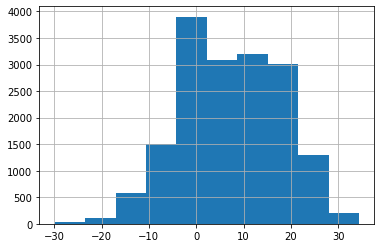

In [ ]:
# Гистограмма - график, который показывает, сколько раз встречалось то или иное значние
data['T'].hist()

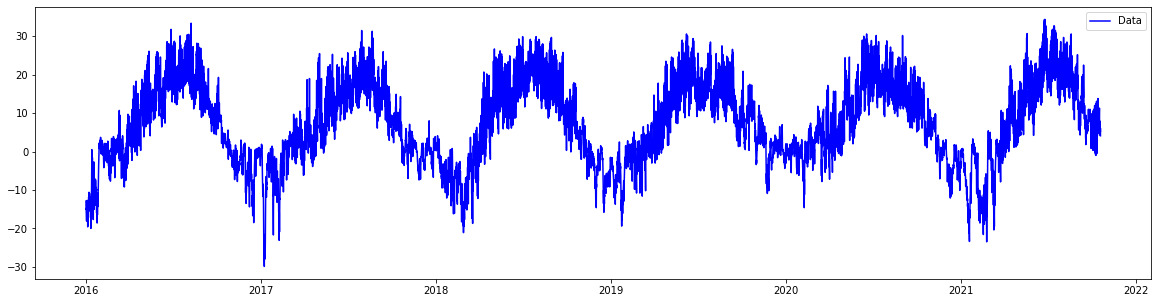

In [ ]:
# Строим график с помощью функции из библиотеки matplotlib (загрузили ее с коротким именем plt)
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['T'], color='blue', label='Data')
plt.legend()

# Разбор упражнения  1-го дня

In [ ]:
# Приблизить график аномалии в 2017 году (например, обрезать с ноября 2016 по март 2017)
# 1) Это упражнение можно сделать скомбинировав код с вебинара (займет 4 строчки на создание data_short)
# 2) Есть много способов задать data_short в 1 строчку, гуглить можно и нужно (задание со *)

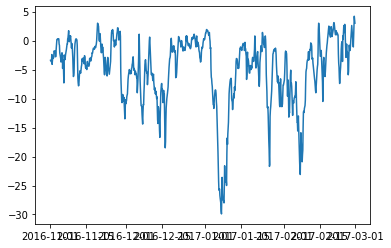

In [ ]:
# 1) вариант как можно было делать упражнение:
# data['date'] < '2017-03-01'
# data['date'] > '2016-11-01'

condition_left = data['date'] > '2016-11-01'
data_left = data[condition_left]

condition_right = data_left['date'] < '2017-03-01'
data_short = data_left[condition_right]

plt.plot(data_short['date'], data_short['T'])

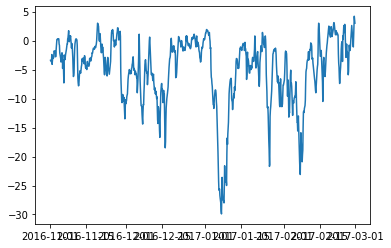

In [ ]:
# 2) вариант в одну строку

condition = (data['date'] < '2017-03-01') & (data['date'] > '2016-11-01')
data_short = data[condition]
plt.plot(data_short['date'], data_short['T'])

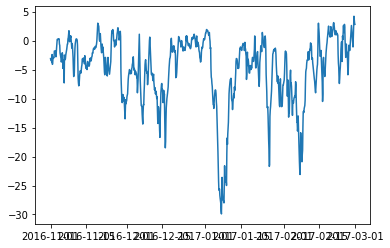

In [ ]:
# 3) вариант в одну строку с помощью функции between

data_short = data[data['date'].between('2016-11-01', '2017-03-01')]
plt.plot(data_short['date'], data_short['T'])

In [ ]:
# Сгенерируем новый признак: день в году

data['dayofyear'] = data['date'].dt.dayofyear

In [ ]:
data['dayofyear']

0        291
1        291
2        291
3        291
4        291
        ... 
16933      1
16934      1
16935      1
16936      1
16937      1
Name: dayofyear, Length: 16937, dtype: int64

# 1 подготовительный шаг: сгенерируем новый признак

In [ ]:
# Подключаем библиотеку с математическими функциями
import numpy as np

In [ ]:
# Новый признак: косинус от дня в году.
# Период [1, 366] перегоним в период [0, 2*pi] (подгоняем косинусоиду по ширине)
# день в году в радианах = (dayofyear - 1) / 366 * 2*pi
# косинус от дня в году = cos(день в году в радианах из диапазона 0 до 2*pi)
scaled_dayofyear = (data['dayofyear'] - 1) / 366 * 2 * np.pi
data['cos_dayofyear'] = np.cos(scaled_dayofyear)

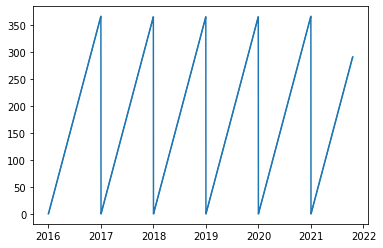

In [ ]:
plt.plot(data['date'], data['dayofyear'])

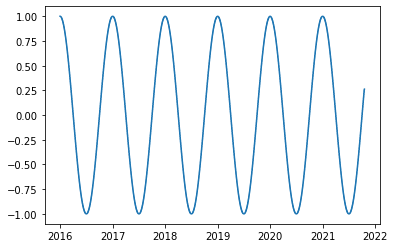

In [ ]:
plt.plot(data['date'], data['cos_dayofyear'])

# 2 подготовительный шаг - Разделение данных на train-test

In [ ]:
# data_train - обучающая выборка
# data_test - тестовая выборка

In [ ]:
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

No handles with labels found to put in legend.


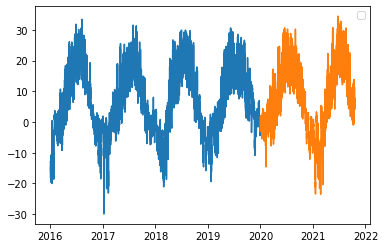

In [ ]:
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'])
plt.legend()

In [ ]:
# Для того, чтобы обучить модель, нужно еще раз разделить выборку 
# на фичи (признаки, features, X) и таргет (целевую переменную, которую прогнозируем, target, y)
# 2 датасета train-test х 2 features-target - создаем 4 переменных: 
# X_train, y_train, X_test, y_test
# 
# 
# Мы будем делать прогноз только на одном факторе - номере дня в году data['dayofyear']
# Но модель ожидает, что ей на вход придет двумерная таблица с многими факторами - 
# поэтому создаем из колонки date['T'] полноценную таблицу pandas DataFrame
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']

# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test = data_test['T']

In [ ]:
X_train

,cos_dayofyear
5254,0.999411
5255,0.999411
5256,0.999411
5257,0.999411
5258,0.999411
...,...
16933,1.000000
16934,1.000000
16935,1.000000
16936,1.000000


# 1 модель: Линейная регрессия (Linear Regression)

Будем с ее помощью подгонять коэффициент при косинусе так, чтобы растянуть его в высоту до уровня наших данных

$z = a \cos(dayofyear) + b$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создаем пустой объект со случайными a и b, которые пока не описывают наши данные
model = LinearRegression()

In [ ]:
# Обучаем модель: подгоняем модель по данным X_train и говорим "правильные ответы" - y_train
model.fit(X_train, y_train)

LinearRegression()

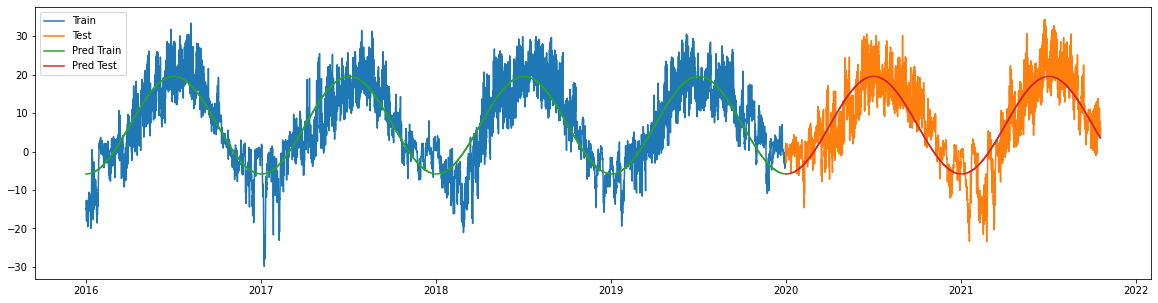

In [ ]:
# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем 
pred_train = model.predict(X_train)
# прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

# Распечатаем графики
plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'], label='Train')
plt.plot(data_test['date'], data_test['T'], label='Test')
plt.plot(data_train['date'], pred_train, label='Pred Train')
plt.plot(data_test['date'], pred_test, label='Pred Test')
plt.legend()

In [ ]:
# Проверяем качество численно

# mean_absolute_error - средняя сумма отклонений (меньше -> лучше)

from sklearn.metrics import mean_absolute_error

print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

Средняя ошибка на тестовой выборке = 4.578715441934872


Средняя ошибка на обучающей выборке = 4.273310125395435
Средняя ошибка на тестовой выборке = 4.578715441934872


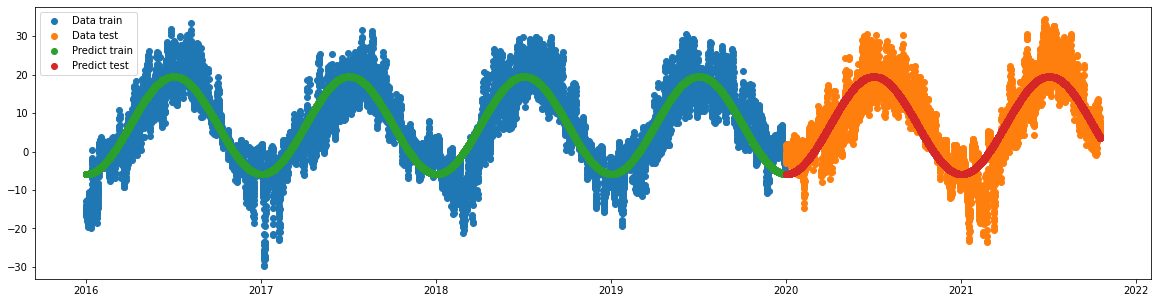

In [ ]:
# Собираем все шаги воедино

# Новый признак: косинус от дня в году
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

# Из train-test формируем X_train, X_test
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']  # X
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
# "y" оставляем прежним
y_train = data_train['T']
y_test = data_test['T']

# Создаем модель и обучаем ее
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

# 1) LinearRegression + cos_dayofyear
# Средняя ошибка на обучающей выборке = 
# Средняя ошибка на тестовой выборке = 

In [ ]:
# z(x) = -12.7 * cos(scaled_dayofyear) + 6.9
model.coef_, model.intercept_

(array([-12.69554741]), 6.856668423253638)

# 2 Модель: Дерево решений (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Средняя ошибка на обучающей выборке = 3.6437873063246125
Средняя ошибка на тестовой выборке = 4.647444490245206


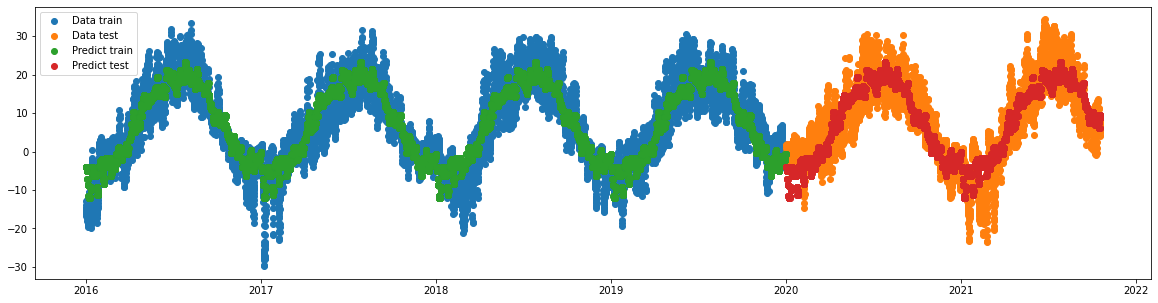

In [ ]:
# 2) Decision Tree + dayofyear
# Новый признак: косинус от дня в году
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

# Из train-test формируем X_train, X_test
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
# "y" оставляем прежним
y_train = data_train['T']
y_test = data_test['T']

# Создаем модель и обучаем ее
model = DecisionTreeRegressor()   #заменяем название модели
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

# 1) LinearRegression + cos_dayofyear
# Средняя ошибка на обучающей выборке = 4.273310125395435
# Средняя ошибка на тестовой выборке = 4.578715441934872

# 1) DecisionTreeRegressor + cos_dayofyear
# Средняя ошибка на обучающей выборке = 3.6437873063246125
# Средняя ошибка на тестовой выборке = 4.647444490245206

# Как мы можем улучшить модель?

# Модель 2.1 Decision Tree + dayofyear + настройка параметров

Средняя ошибка на обучающей выборке = 3.7469198089127693
Средняя ошибка на тестовой выборке = 4.545731192829994


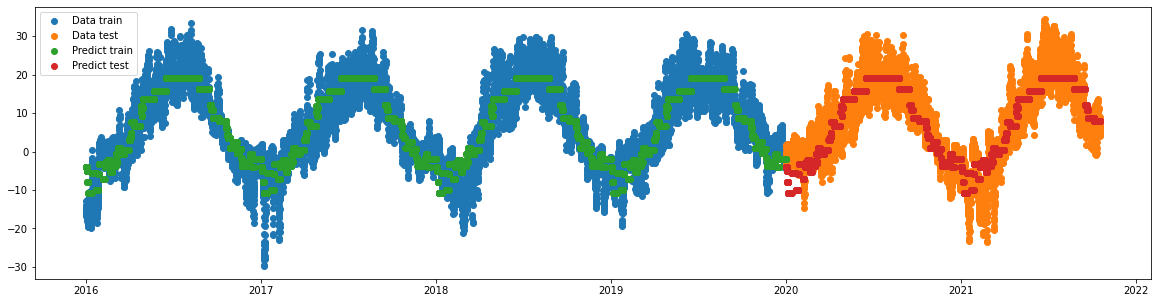

In [ ]:
# 2.1) Decision Tree + dayofyear + настройка параметров

# model = DecisionTreeRegressor(max_depth=5)  # Заменяем модель

# 2) Decision Tree + dayofyear

# Собираем все шаги воедино

# Новый признак: косинус от дня в году
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

# Из train-test формируем X_train, X_test
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']  # заменяем признак в 2х местах
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']   # заменяем признак в 2х местах
# "y" оставляем прежним
y_train = data_train['T']
y_test = data_test['T']

# Создаем модель и обучаем ее
model = DecisionTreeRegressor(max_depth=6)   #добавляем параметр
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

# Домашнее задание

1) Протестировать качество модели DecisionTreeRegressor + cos(день в году)

2) Поиграть с признаками - добавить больше признаков в модель (sin, sin & cos, dayofyear & cos и т.п.)

#Прошлые результаты

1) LinearRegression + cos_dayofyear
- Средняя ошибка на обучающей выборке = 4.273310125395435
- Средняя ошибка на тестовой выборке = 4.578715441934872  базовая модель

2) DecisionTreeRegressor + cos_dayofyear
- Средняя ошибка на обучающей выборке = 3.6437873063246125
- Средняя ошибка на тестовой выборке = 4.647444490245206   Наименее точная модель

3) DecisionTreeRegressor + cos_dayofyear
- Средняя ошибка на обучающей выборке = 3.7469198089127693
- Средняя ошибка на тестовой выборке = 4.545731192829994   Наиболее точная

# Посмотрел разные варианты:
Decision Tree + dayofyear & cos_dayofyear + max_depth=6
- Средняя ошибка на обучающей выборке = 3.7310375548263157
- Средняя ошибка на тестовой выборке = 4.591033687044958

Decision Tree + dayofyear & cos_dayofyear + max_depth=5
- Средняя ошибка на обучающей выборке = 3.7842844292510907
- Средняя ошибка на тестовой выборке = 4.550860543524826

Decision Tree + dayofyear & sin_dayofyear + max_depth=6
- Средняя ошибка на обучающей выборке = 3.744948955593602
- Средняя ошибка на тестовой выборке = 4.5577526084737805

Decision Tree + dayofyear & sin_dayofyear + max_depth=5
- Средняя ошибка на обучающей выборке = 3.8306063873555183
- Средняя ошибка на тестовой выборке = 4.594083859911853

Decision Tree + cos_dayofyear & sin_dayofyear + max_depth=6
- Средняя ошибка на обучающей выборке = 3.7541601293206655
- Средняя ошибка на тестовой выборке = 4.543646253673536

Decision Tree + dayofyear & cos_dayofyear & sin_dayofyear + max_depth=6
- Средняя ошибка на обучающей выборке = 3.754906924415262
- Средняя ошибка на тестовой выборке = 4.505506549078934

# Самый лучший результат:
Decision Tree + dayofyear & cos_dayofyear & sin_dayofyear & Барическая тенденция(Pa) & Относительная влажность(U) & Температура точки росы(Td) + max_depth=6
- Средняя ошибка на обучающей выборке = 1.1700028759671075
- Средняя ошибка на тестовой выборке = 1.3533628595548115

In [ ]:
print(data.shape)
data = data[data['U'].notna()]
data = data[data['Pa'].notna()]
print(data[data['Pa'].isna()])

(16910, 33)
Empty DataFrame
Columns: [Местное время в Москве (ВДНХ), T, Po, P, Pa, U, DD, Ff, ff10, ff3, N, WW, W1, W2, Tn, Tx, Cl, Nh, H, Cm, Ch, VV, Td, RRR, tR, E, Tg, E', sss, date, dayofyear, cos_dayofyear, sin_dayofyear]
Index: []

[0 rows x 33 columns]


Средняя ошибка на обучающей выборке = 0.0003507643949135717
Средняя ошибка на тестовой выборке = 0.3054917381633302


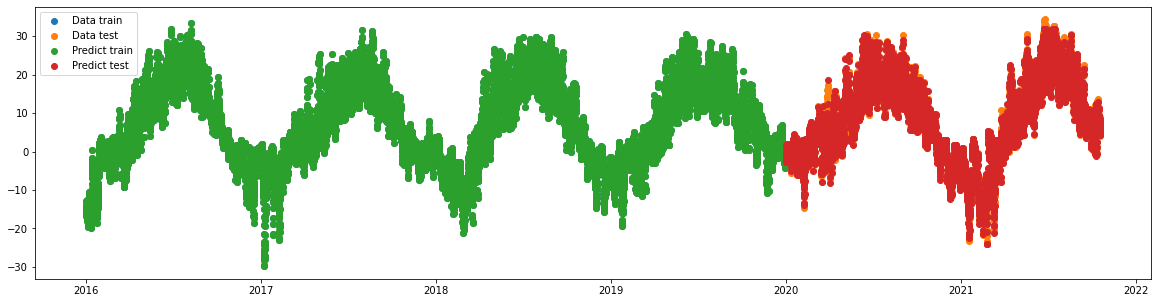

In [ ]:
#признак: косинус от дня в году
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)
#признак: синус от дня в году
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# print(data.shape)

# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

feature_columns = ['dayofyear', 'cos_dayofyear', 'Pa', 'U', 'Td']

# Из train-test формируем X_train, X_test
X_train = pd.DataFrame()
X_train = data_train[feature_columns]

X_test = pd.DataFrame()
X_test = data_test[feature_columns]

# print("Train:", data_train.head(10))
# print("Test:", data_test.head(10))
# print("X_test", X_test)

# "y" оставляем прежним
y_train = data_train['T']
y_test = data_test['T']

# Создаем модель и обучаем ее
model = DecisionTreeRegressor(max_depth=18)   #добавляем параметр
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

# Decision Tree + dayofyear & cos_dayofyear + max_depth=6
# Средняя ошибка на обучающей выборке = 3.7310375548263157
# Средняя ошибка на тестовой выборке = 4.591033687044958

# Decision Tree + dayofyear & cos_dayofyear + max_depth=5
# Средняя ошибка на обучающей выборке = 3.7842844292510907
# Средняя ошибка на тестовой выборке = 4.550860543524826

# Decision Tree + dayofyear & sin_dayofyear + max_depth=6
# Средняя ошибка на обучающей выборке = 3.744948955593602
# Средняя ошибка на тестовой выборке = 4.5577526084737805

# Decision Tree + dayofyear & sin_dayofyear + max_depth=5
# Средняя ошибка на обучающей выборке = 3.8306063873555183
# Средняя ошибка на тестовой выборке = 4.594083859911853

# Decision Tree + cos_dayofyear & sin_dayofyear + max_depth=6
# Средняя ошибка на обучающей выборке = 3.7541601293206655
# Средняя ошибка на тестовой выборке = 4.543646253673536

# Decision Tree + dayofyear & cos_dayofyear & sin_dayofyear + max_depth=6
# Средняя ошибка на обучающей выборке = 3.754906924415262
# Средняя ошибка на тестовой выборке = 4.505506549078934

# Decision Tree + dayofyear & cos_dayofyear & sin_dayofyear & Барическая тенденция(Pa) & Относительная влажность(U) & Температура точки росы(Td) + max_depth=6
# Средняя ошибка на обучающей выборке = 1.1700028759671075
# Средняя ошибка на тестовой выборке = 1.3533628595548115

# Decision Tree + dayofyear & cos_dayofyear & sin_dayofyear & Барическая тенденция(Pa) & Относительная влажность(U) & Температура точки росы(Td) + max_depth=18
# Средняя ошибка на обучающей выборке = 0.00027018145449351507
# Средняя ошибка на тестовой выборке = 0.3137878932316492

# Decision Tree + dayofyear & cos_dayofyear & Барическая тенденция(Pa) & Относительная влажность(U) & Температура точки росы(Td) + max_depth=18
# Средняя ошибка на обучающей выборке = 0.0003507643949135717
# Средняя ошибка на тестовой выборке = 0.3054917381633302